### Problem Statement

### Business Context

The prices of the stocks of companies listed under a global exchange are influenced by a variety of factors, with the company's financial performance, innovations and collaborations, and market sentiment being factors that play a significant role. News and media reports can rapidly affect investor perceptions and, consequently, stock prices in the highly competitive financial industry. With the sheer volume of news and opinions from a wide variety of sources, investors and financial analysts often struggle to stay updated and accurately interpret its impact on the market. As a result, investment firms need sophisticated tools to analyze market sentiment and integrate this information into their investment strategies.

### Problem Definition
With an ever-rising number of news articles and opinions, an investment startup aims to leverage artificial intelligence to address the challenge of interpreting stock-related news and its impact on stock prices. They have collected historical daily news for a specific company listed under NASDAQ, along with data on its daily stock price and trade volumes.

As a member of the Data Science and AI team in the startup, you have been tasked with analyzing the data, developing an AI-driven sentiment analysis system that will automatically process and analyze news articles to gauge market sentiment, and summarizing the news at a weekly level to enhance the accuracy of their stock price predictions and optimize investment strategies. This will empower their financial analysts with actionable insights, leading to more informed investment decisions and improved client outcomes.



### Data Dictionary

Date : The date the news was released

News : The content of news articles that could potentially affect the company's stock price

Open : The stock price (in $) at the beginning of the day

High : The highest stock price (in $) reached during the day

Low : The lowest stock price (in $) reached during the day

Close : The adjusted stock price (in $) at the end of the day

Volume : The number of shares traded during the day

Label : The sentiment polarity of the news content
1: positive
0: neutral
-1: negative

### Install necessary Libraries

In [ ]:
!pip uninstall -y numpy pandas numba contourpy sentence-transformers transformers tqdm huggingface_hub llama-cpp-python

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
Found existing installation: numba 0.60.0
Uninstalling numba-0.60.0:
  Successfully uninstalled numba-0.60.0
Found existing installation: contourpy 1.3.2
Uninstalling contourpy-1.3.2:
  Successfully uninstalled contourpy-1.3.2
Found existing installation: sentence-transformers 3.4.1
Uninstalling sentence-transformers-3.4.1:
  Successfully uninstalled sentence-transformers-3.4.1
Found existing installation: transformers 4.51.3
Uninstalling transformers-4.51.3:
  Successfully uninstalled transformers-4.51.3
Found existing installation: tqdm 4.67.1
Uninstalling tqdm-4.67.1:
  Successfully uninstalled tqdm-4.67.1
Found existing installation: huggingface-hub 0.30.2
Uninstalling huggingface-hub-0.30.2:
  Successfully uninstalled huggingface-hub-0.30.2


In [ ]:
import os

In [ ]:
!pip install --numba 0.61.0
!pip install contourpy


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --numba


In [ ]:
# Install compatible versions
!pip install numpy==1.26.4 pandas==2.2.2 gensim==4.3.3 sentence-transformers transformers tqdm huggingface_hub==0.30.0 -q
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.2.45 -q

#!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.7/36.7 MB 9.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
# Importing library for data manipulation
import pandas as pd
import numpy as np

# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama


# Importing the json module
import json

from tqdm import tqdm # For progress bar related functionalities
tqdm.pandas()

In [ ]:
# Importing dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
reviews= pd.read_csv('/content/drive/My Drive/stock_news.csv')

In [ ]:
# creating a copy of reviews data
data = reviews.copy()

### Data Overview

In [ ]:
# check first 10 rows
data.head(10)

,Date,News,Open,High,Low,Close,Volume,Label
0,2019-01-02,The tech sector experienced a significant dec...,41.740002,42.244999,41.482498,40.246914,130672400,-1
1,2019-01-02,Apple lowered its fiscal Q1 revenue guidance ...,41.740002,42.244999,41.482498,40.246914,130672400,-1
2,2019-01-02,Apple cut its fiscal first quarter revenue fo...,41.740002,42.244999,41.482498,40.246914,130672400,-1
3,2019-01-02,This news article reports that yields on long...,41.740002,42.244999,41.482498,40.246914,130672400,-1
4,2019-01-02,Apple's revenue warning led to a decline in U...,41.740002,42.244999,41.482498,40.246914,130672400,-1
5,2019-01-02,Apple CEO Tim Cook discussed the company's Q1 ...,41.740002,42.244999,41.482498,40.246914,130672400,0
6,2019-01-02,Roku Inc has announced plans to offer premium...,41.740002,42.244999,41.482498,40.246914,130672400,1
7,2019-01-02,Wall Street saw modest gains on Wednesday but...,41.740002,42.244999,41.482498,40.246914,130672400,-1
8,2019-01-02,Apple's fiscal first quarter revenue came in ...,41.740002,42.244999,41.482498,40.246914,130672400,-1
9,2019-01-02,Apple Inc. lowered its quarterly sales foreca...,41.740002,42.244999,41.482498,40.246914,130672400,-1


In [ ]:
data.shape

(349, 8)

Data has 349 rows and 8 columns

In [ ]:
# checking for missing values
data.isnull().sum()

,0
Date,0
News,0
Open,0
High,0
Low,0
Close,0
Volume,0
Label,0


There are no missing values

In [ ]:
data.dtypes

,0
Date,object
News,object
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64
Label,int64


Here the datatype of Date  is object.

In [ ]:
# convert the Date column to Datetime format
data['Date']= pd.to_datetime(data['Date'])

In [ ]:
data.describe()

,Date,Open,High,Low,Close,Volume,Label
count,349,349.000000,349.000000,349.000000,349.000000,3.490000e+02,349.000000
mean,2019-02-16 16:05:30.085959936,46.229233,46.700458,45.745394,44.926317,1.289482e+08,-0.054441
min,2019-01-02 00:00:00,37.567501,37.817501,37.305000,36.254131,4.544800e+07,-1.000000
25%,2019-01-14 00:00:00,41.740002,42.244999,41.482498,40.246914,1.032720e+08,-1.000000
50%,2019-02-05 00:00:00,45.974998,46.025002,45.639999,44.596924,1.156272e+08,0.000000
75%,2019-03-22 00:00:00,50.707500,50.849998,49.777500,49.110790,1.511252e+08,0.000000
max,2019-04-30 00:00:00,66.817497,67.062500,65.862503,64.805229,2.444392e+08,1.000000
std,NaN,6.442817,6.507321,6.391976,6.398338,4.317031e+07,0.715119


In [ ]:
# check for duplicate values
data.duplicated().sum()

0

### EDA - Exploratory Data Analysis

### Univariate Analysis

Distribution of Individual Variables

In [ ]:
data.groupby(['Label']).count()['News']

,News
Label,
-1,99
0,170
1,80


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-14-54614ba2cd22>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Negative', 'Neutral', 'Positive']) # adding. labels to the bars


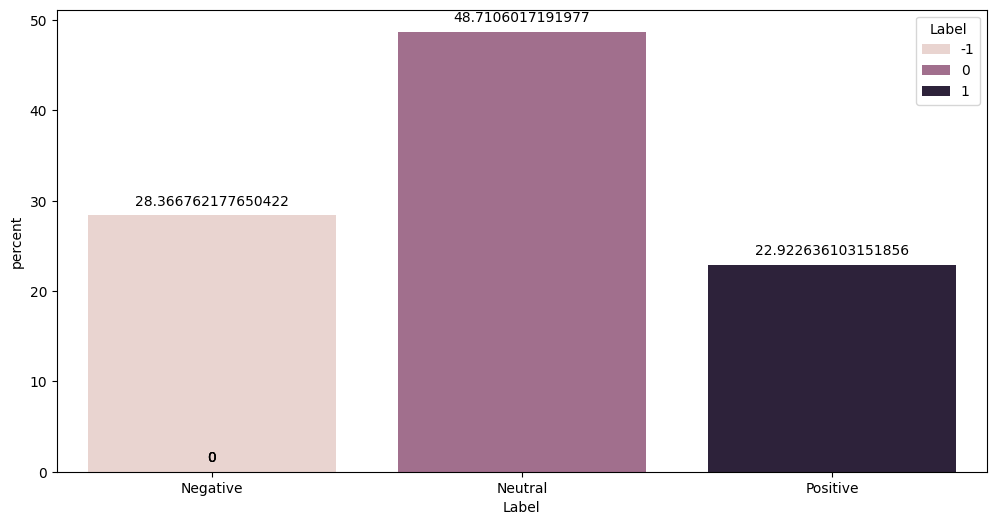

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='Label',data=data, hue= 'Label',stat = "percent")
ax.set_xticklabels(['Negative', 'Neutral', 'Positive']) # adding. labels to the bars

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

Highest reviews are neutral. Negative and positive reviews being apporximately balanced.

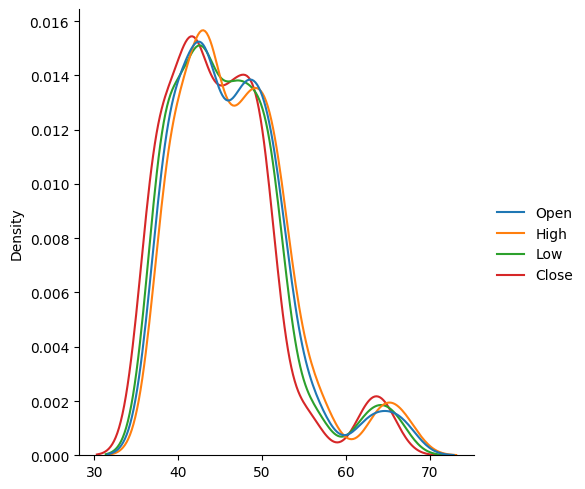

In [ ]:
# Density plot of prices
sns.displot(data=data[['Open','High', 'Low', 'Close']], kind = 'kde')


The stock prices for stocks- open, high, low and close are nearly the same.

<Axes: xlabel='Volume', ylabel='Count'>

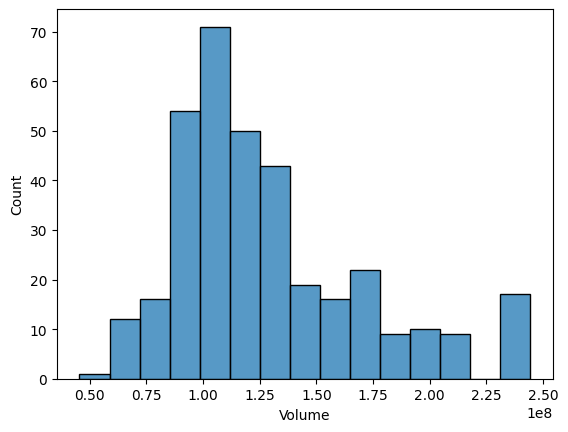

In [ ]:
# plot the volume
sns.histplot(data= data, x= 'Volume')

### Compute and check the distribution of the length of news content

In [ ]:
# calculate the no of words in each news article in the 'News' column and stores it in the 'News_length' column.
data['News_length'] = data['News'].apply(lambda x: len(x.split(' ')))
# lambda x:: Defines an anonymous function that takes an input x (which will be each news article in this case).
# x.split(' '): Splits the news article (x) into a list of words using space as the delimiter.
# len(...): Calculates the length of the resulting list of words, essentially counting the number of words in the news article.

Check the distribution of News using a historam

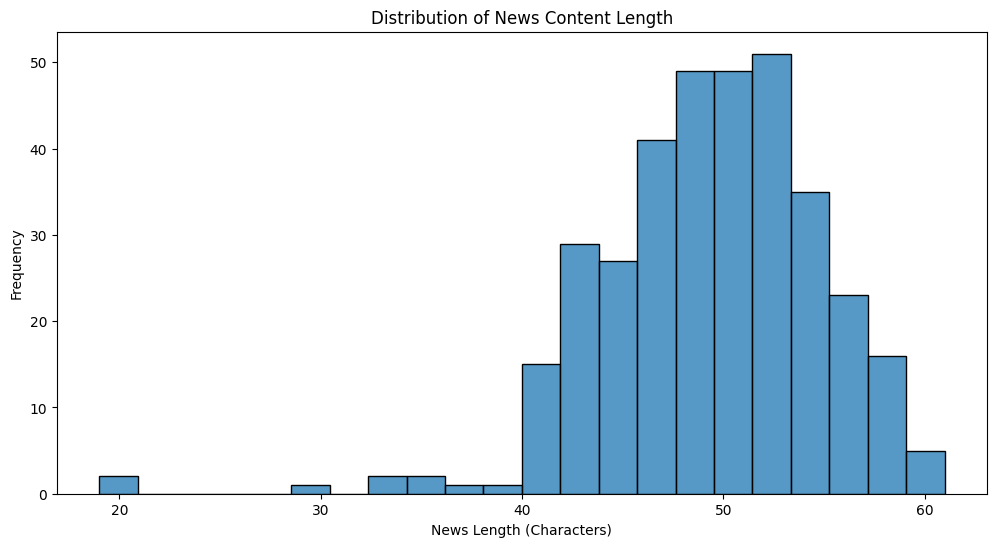

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data=data, x= 'News_length')
plt.title('Distribution of News Content Length')
plt.xlabel('News Length (Characters)')
plt.ylabel('Frequency')
plt.show()

We could see that the distribution of News content length is left skewed.

### Statistical summary for the news content length

In [ ]:
data['News_length'].describe()

,News_length
count,349.000000
mean,49.312321
std,5.727770
min,19.000000
25%,46.000000
50%,50.000000
75%,53.000000
max,61.000000


The dataset contains 349 news articles.
The average length of the news articles is approximately 49.31 words.
The lengths of the news articles vary, with a standard deviation of approximately 5.73 words.
The shortest news article contains 19 words, while the longest contains 61 words.
The median length of the news articles is 50 words, indicating that half of the articles have 50 words or fewer.
The 25th and 75th percentiles are 46 and 53 words, respectively, indicating the range within which the middle 50% of the news article lengths fall.

Important Considerations:

Preprocessing: Before calculating the length, you might want to perform text preprocessing like removing punctuation, converting to lowercase, etc., depending on your analysis needs.

Distribution Shape: Observe the shape of the histogram. Is it skewed, normal, or multimodal? This provides insights into the nature of your news content length.

Outliers: Outliers can significantly affect the distribution and analysis. Consider handling them appropriately (e.g., removing, transforming) based on your analysis goals.

Data Interpretation: Relate the distribution of news content length to your sentiment analysis findings. For example, does sentiment vary with news length?

Are longer articles more likely to be positive or negative? This can provide valuable insights for your model.

### Bivariate Analysis

Here we have to explore the relationships between the following

* Sentiment (Label) and News Length (news_len): Does the sentiment of news articles vary with their length?

* Sentiment and Stock Price (Open, High, Low, Close): How does sentiment relate to stock price movements?

* Sentiment and Volume: Is there a correlation between sentiment and trading volume?

* News Length and Stock Price: Does the length of news articles have an impact on stock prices?

<Axes: xlabel='Label', ylabel='News_length'>

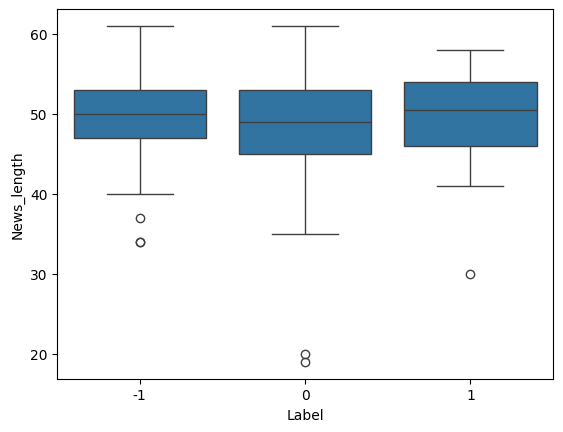

In [ ]:
# check the relation between News Lenght and Label
sns.boxplot(data= data, x="Label", y="News_length")


There are no max outliers showing the news_lenght

<Axes: xlabel='News_length', ylabel='Label'>

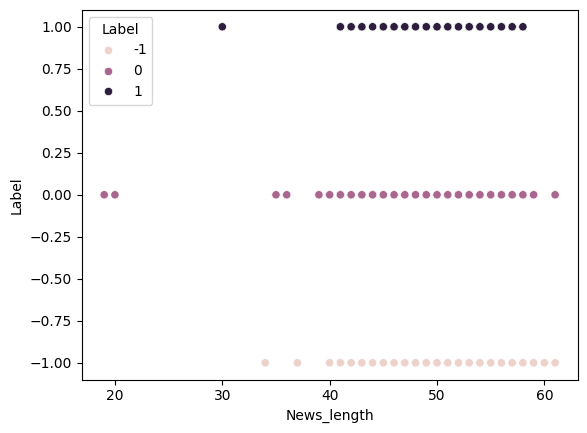

In [ ]:
sns.scatterplot(data= data, y="Label", x="News_length", hue= "Label")

In [ ]:
data.head()

,Date,News,Open,High,Low,Close,Volume,Label,News_length
0,2019-01-02,The tech sector experienced a significant dec...,41.740002,42.244999,41.482498,40.246914,130672400,-1,46
1,2019-01-02,Apple lowered its fiscal Q1 revenue guidance ...,41.740002,42.244999,41.482498,40.246914,130672400,-1,51
2,2019-01-02,Apple cut its fiscal first quarter revenue fo...,41.740002,42.244999,41.482498,40.246914,130672400,-1,49
3,2019-01-02,This news article reports that yields on long...,41.740002,42.244999,41.482498,40.246914,130672400,-1,51
4,2019-01-02,Apple's revenue warning led to a decline in U...,41.740002,42.244999,41.482498,40.246914,130672400,-1,50


### plot relation of sentiment to stock_price

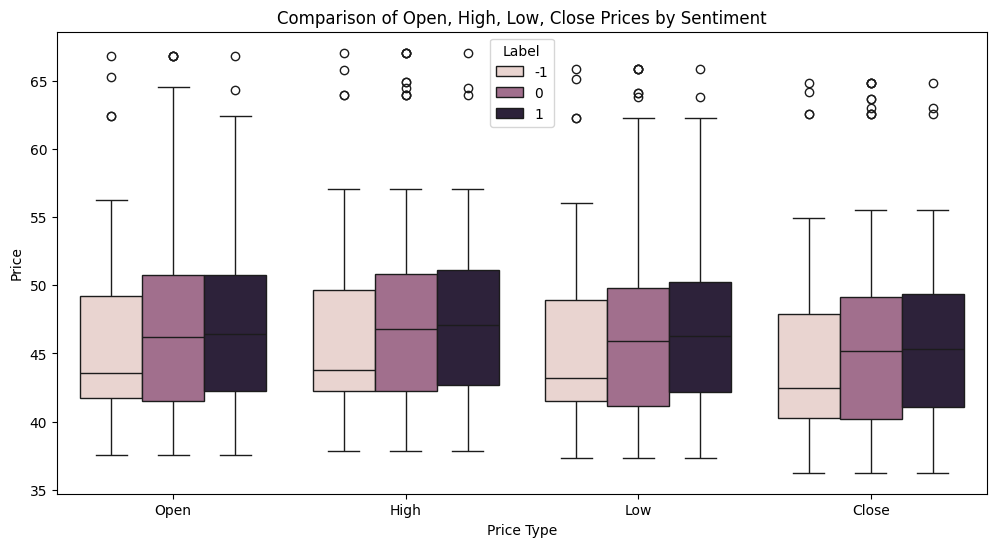

In [ ]:
# Melt the DataFrame to combine Open, High, Low, Close into a single column
melted_data = pd.melt(data, id_vars=['Label'], value_vars=['Open', 'High', 'Low', 'Close'], var_name='Price_Type', value_name='Price')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Price_Type', y='Price', hue='Label', data=melted_data)
plt.title('Comparison of Open, High, Low, Close Prices by Sentiment')
plt.xlabel('Price Type')
plt.ylabel('Price')
plt.show()

### Check the relation between sentiment and trading volume

<Axes: xlabel='Label', ylabel='Volume'>

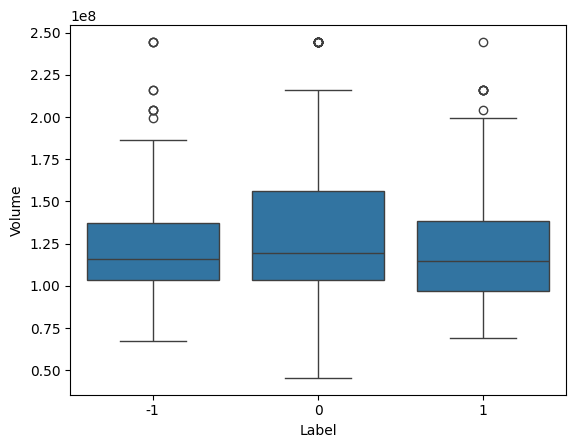

In [ ]:
sns.boxplot(data=data, x= 'Label', y='Volume')

### Does the length of news articles have an impact on stock prices?

<Axes: xlabel='News_length', ylabel='Close'>

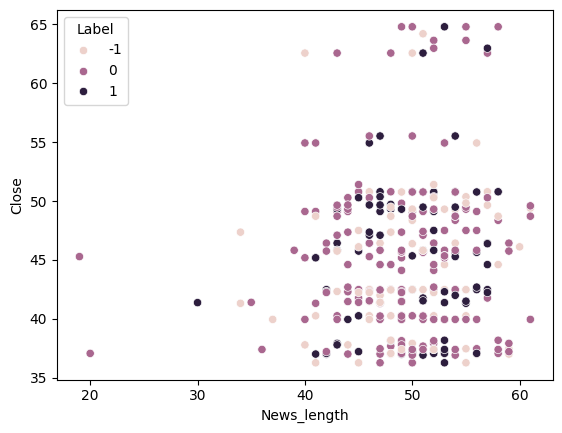

In [ ]:
sns.scatterplot(data=data, x= 'News_length', y = 'Close' , hue='Label')

<Axes: xlabel='News_length', ylabel='High'>

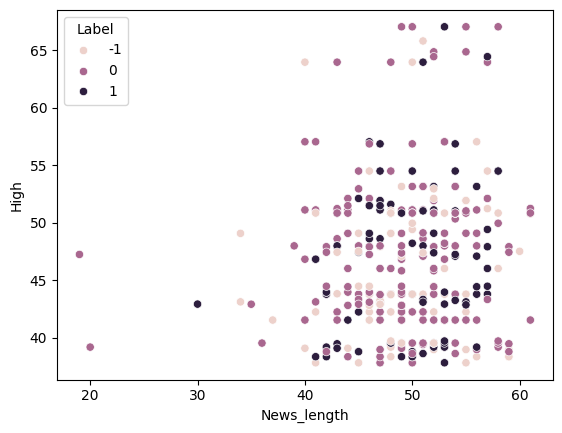

In [ ]:
sns.scatterplot(data=data, x= 'News_length', y = 'High' , hue='Label')

Correlation matrix

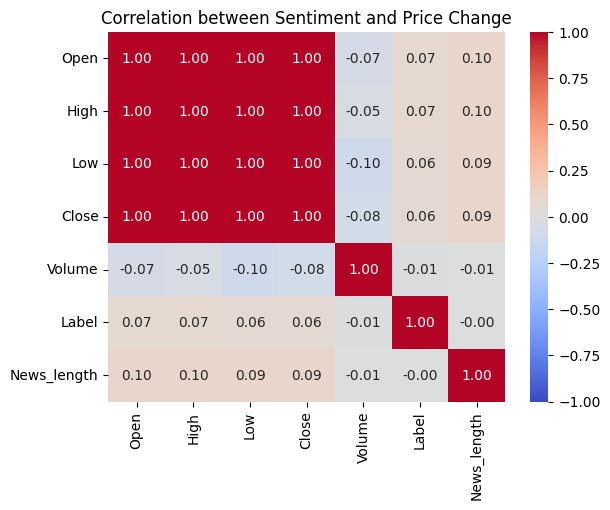

In [ ]:
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="coolwarm")
plt.title('Correlation between Sentiment and Price Change')
plt.show()

### Prices of stock related to date

In [ ]:
stock_daily = data.groupby('Date').agg(
    {
        'Open': 'mean',
        'High': 'mean',
        'Low': 'mean',
        'Close': 'mean',
        'Volume': 'mean',
    }
).reset_index()  # Group the 'stocks' DataFrame by the 'Date' column

stock_daily.set_index('Date', inplace=True)
stock_daily.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02,41.740002,42.244999,41.482498,40.246914,130672400.0
2019-01-03,43.570000,43.787498,43.222500,42.470604,103544800.0
2019-01-04,47.910000,47.919998,47.095001,46.419842,111448000.0
2019-01-07,50.792500,51.122501,50.162498,49.110790,109012000.0
2019-01-08,53.474998,54.507500,51.685001,50.787209,216071600.0


<Axes: xlabel='Date'>

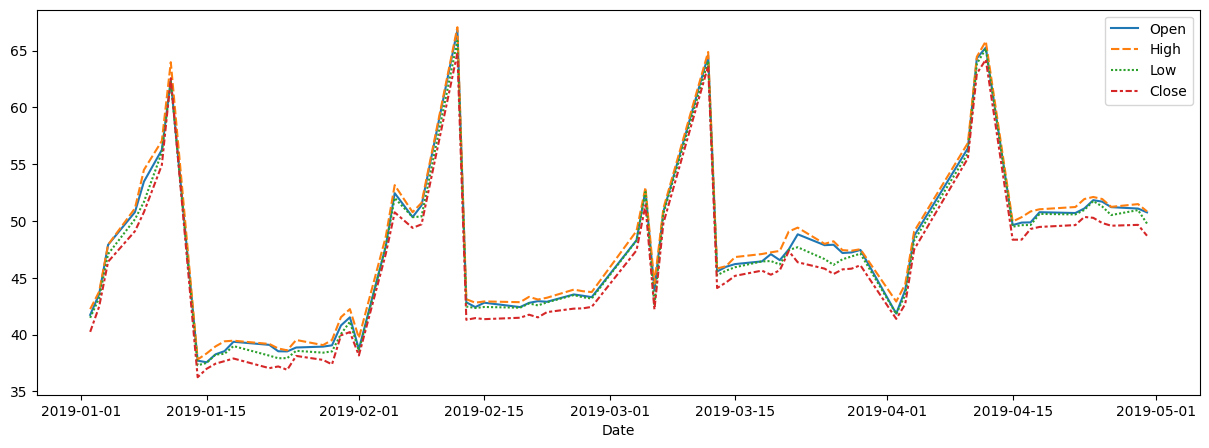

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(stock_daily.drop("Volume", axis=1))

We could see the varition in prices on different dates

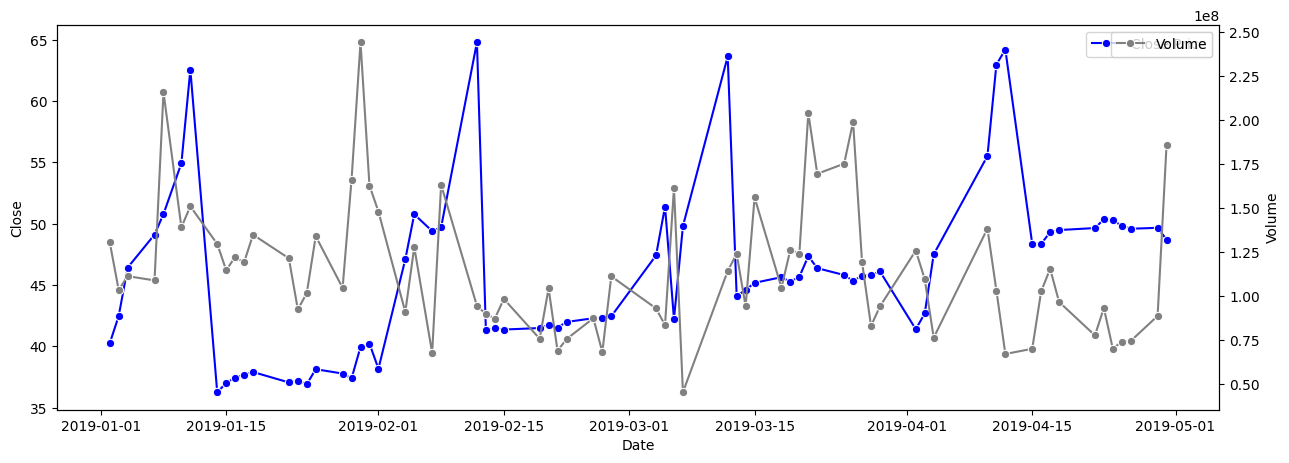

In [ ]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(15,5))

# Lineplot on primary y-axis
sns.lineplot(data=stock_daily.reset_index(), x='Date', y='Close', ax=ax1, color='blue', marker='o', label='Close Price')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Lineplot on secondary y-axis
sns.lineplot(data=stock_daily.reset_index(), x='Date', y='Volume', ax=ax2, color='gray', marker='o', label='Volume')

ax1.legend(bbox_to_anchor=(1,1));

We could see the variation in volume in different dates.

### Data Preprocessing

Since we are dealing with time-series data (Stock Prices and news articles overtime), we need to split the data using the dates.

In [ ]:
data['Date'].describe()

,Date
count,349
mean,2019-02-16 16:05:30.085959936
min,2019-01-02 00:00:00
25%,2019-01-14 00:00:00
50%,2019-02-05 00:00:00
75%,2019-03-22 00:00:00
max,2019-04-30 00:00:00


### TEXT PREPROCESSING

### Removing special characters from the text

In [ ]:
# to use regular expressions for manipulating text data
import re

In [ ]:
# defining a function to remove special characters
def remove_special_characters(text):
    # Defining the regex pattern to match non-alphanumeric characters
    pattern = '[^A-Za-z0-9]+'

    # Finding the specified pattern and replacing non-alphanumeric characters with a blank string
    new_text = ''.join(re.sub(pattern, ' ', text))

    return new_text

In [ ]:
# Applying the function to remove special characters
data['cleaned_text'] = data['News'].apply(remove_special_characters)

In [ ]:
# checking a couple of instances of cleaned data
data.loc[4:8, ['News','cleaned_text']]

,News,cleaned_text
4,Apple's revenue warning led to a decline in U...,Apple s revenue warning led to a decline in U...
5,Apple CEO Tim Cook discussed the company's Q1 ...,Apple CEO Tim Cook discussed the company s Q1 ...
6,Roku Inc has announced plans to offer premium...,Roku Inc has announced plans to offer premium...
7,Wall Street saw modest gains on Wednesday but...,Wall Street saw modest gains on Wednesday but...
8,Apple's fiscal first quarter revenue came in ...,Apple s fiscal first quarter revenue came in ...


### Lowercasing

In [ ]:
# changing the case of the text data to lower case
data['cleaned_text'] = data['cleaned_text'].str.lower()

In [ ]:
# checking a couple of instances of cleaned data
data.loc[0:3, ['News','cleaned_text']]

,News,cleaned_text
0,The tech sector experienced a significant dec...,the tech sector experienced a significant dec...
1,Apple lowered its fiscal Q1 revenue guidance ...,apple lowered its fiscal q1 revenue guidance ...
2,Apple cut its fiscal first quarter revenue fo...,apple cut its fiscal first quarter revenue fo...
3,This news article reports that yields on long...,this news article reports that yields on long...


### Remove Extra Whitespace

In [ ]:
# removing extra whitespaces from the text
data['cleaned_text'] = data['cleaned_text'].str.strip()

In [ ]:
# checking a couple of instances of cleaned data
data.loc[3:8, ['News','cleaned_text']]

,News,cleaned_text
3,This news article reports that yields on long...,this news article reports that yields on long ...
4,Apple's revenue warning led to a decline in U...,apple s revenue warning led to a decline in us...
5,Apple CEO Tim Cook discussed the company's Q1 ...,apple ceo tim cook discussed the company s q1 ...
6,Roku Inc has announced plans to offer premium...,roku inc has announced plans to offer premium ...
7,Wall Street saw modest gains on Wednesday but...,wall street saw modest gains on wednesday but ...
8,Apple's fiscal first quarter revenue came in ...,apple s fiscal first quarter revenue came in b...


### Remove Stopwords

In [ ]:
# to load the natural language toolkit
import nltk

nltk.download('stopwords')    # loading the stopwords
nltk.download('wordnet')    # loading the wordnet module that is used in stemming

# to remove common stop words
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# defining a function to remove stop words using the NLTK library
def remove_stopwords(text):
    # Split text into separate words
    words = text.split()

    # Removing English language stopwords
    new_text = ' '.join([word for word in words if word not in stopwords.words('english')])

    return new_text

In [ ]:
# Applying the function to remove stop words using the NLTK library
data['cleaned_text_without_stopwords'] = data['cleaned_text'].apply(remove_stopwords)

In [ ]:
# checking a couple of instances of cleaned data
data.loc[0:3,['cleaned_text','cleaned_text_without_stopwords']]

,cleaned_text,cleaned_text_without_stopwords
0,the tech sector experienced a significant decl...,tech sector experienced significant decline af...
1,apple lowered its fiscal q1 revenue guidance t...,apple lowered fiscal q1 revenue guidance 84 bi...
2,apple cut its fiscal first quarter revenue for...,apple cut fiscal first quarter revenue forecas...
3,this news article reports that yields on long ...,news article reports yields long dated u treas...


### Stemming
Stemming is a language processing method that chops off word endings to find the root or base form of words.

The Porter Stemmer is one of the widely-used algorithms for stemming, and it shorten words to their root form by removing suffixes.

In [ ]:
# to perform stemming
from nltk.stem.porter import PorterStemmer

In [ ]:
# Loading the Porter Stemmer
ps = PorterStemmer()

In [ ]:
# defining a function to perform stemming
def apply_porter_stemmer(text):
    # Split text into separate words
    words = text.split()

    # Applying the Porter Stemmer on every word of a message and joining the stemmed words back into a single string
    new_text = ' '.join([ps.stem(word) for word in words])

    return new_text

In [ ]:
# Applying the function to perform stemming
data['cleaned_news'] = data['cleaned_text_without_stopwords'].apply(apply_porter_stemmer)

In [ ]:
# checking a couple of instances of cleaned data
data.loc[0:5,['cleaned_text_without_stopwords','cleaned_news']]

,cleaned_text_without_stopwords,cleaned_news
0,tech sector experienced significant decline af...,tech sector experienc signific declin aftermar...
1,apple lowered fiscal q1 revenue guidance 84 bi...,appl lower fiscal q1 revenu guidanc 84 billion...
2,apple cut fiscal first quarter revenue forecas...,appl cut fiscal first quarter revenu forecast ...
3,news article reports yields long dated u treas...,news articl report yield long date u treasuri ...
4,apple revenue warning led decline usd jpy pair...,appl revenu warn led declin usd jpi pair gain ...
5,apple ceo tim cook discussed company q1 warnin...,appl ceo tim cook discuss compani q1 warn cnbc...


### Split the data into Training, Validation and Test sets

### Since we are dealing with time-series data (Stock Prices and news articles overtime), we need to split the data using the dates.

In [ ]:
# sort the values by data first
data = data.sort_values(by='Date')

In [ ]:
# Define features (X) and target (y)
X = data[['cleaned_news', 'News_length']]
y = data['Label']

In [ ]:
# Calculate split points
total_len = len(data)
train_len = int(0.7 * total_len)  # 70% for training
val_len = int(0.15 * total_len) # 15% for validation

In [ ]:
# Split data into train, validation, and test sets
X_train, X_val, X_test = X[:train_len], X[train_len:train_len + val_len], X[train_len + val_len:]
y_train, y_val, y_test = y[:train_len], y[train_len:train_len + val_len], y[train_len + val_len:]

In [ ]:
print("Train data shape",X_train.shape)
print("Validation data shape",X_val.shape)
print("Test data shape ",X_test.shape)

print("Train label shape",y_train.shape)
print("Validation label shape",y_val.shape)
print("Test label shape ",y_test.shape)

Train data shape (244, 2)
Validation data shape (52, 2)
Test data shape  (53, 2)
Train label shape (244,)
Validation label shape (52,)
Test label shape  (53,)


### WORD EMBEDDINGS

---



### WORD2VEC

In [ ]:
# To load/create word embeddings
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# To work with transformer models
import torch
from sentence_transformers import SentenceTransformer

# To implement progress bar related functionalities
from tqdm import tqdm
tqdm.pandas()

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# creating a list of all words in our data
words_list = [item.split(" ") for item in data['cleaned_news'].values]

In [ ]:
# Checking the words from the first five reviews
words_list[0:5]

[['tech',
  'sector',
  'experienc',
  'signific',
  'declin',
  'aftermarket',
  'follow',
  'appl',
  'q1',
  'revenu',
  'warn',
  'notabl',
  'supplier',
  'includ',
  'skywork',
  'broadcom',
  'lumentum',
  'qorvo',
  'tsmc',
  'saw',
  'stock',
  'drop',
  'respons',
  'appl',
  'downward',
  'revis',
  'revenu',
  'expect',
  'quarter',
  'previous',
  'announc',
  'januari'],
 ['dollar',
  'fell',
  '109',
  '106',
  '67',
  'appl',
  'revenu',
  'warn',
  '10',
  'year',
  'treasuri',
  'yield',
  'also',
  'drop',
  '2',
  '61',
  'follow',
  'money',
  'flow',
  'us',
  'govern',
  'paper',
  'appl',
  'share',
  'u',
  'stock',
  'index',
  'futur',
  'declin',
  'na'],
 ['earli',
  'asian',
  'trade',
  'thursday',
  'japanes',
  'yen',
  'surg',
  'u',
  'dollar',
  'australian',
  'dollar',
  'collaps',
  'thin',
  'market',
  'due',
  'massiv',
  'stop',
  'loss',
  'sale',
  'trigger',
  'appl',
  'earn',
  'warn',
  'sluggish',
  'iphon',
  'sale',
  'china',
  'risk

In [ ]:
# creating an instance of Word2Vec
vec_size = 100
model_W2V = Word2Vec(words_list, min_count = 1, workers = 6)

In [ ]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(list(model_W2V.wv.key_to_index)))

Length of the vocabulary is 2580


In [ ]:
# Checking the word embedding of a random word
word = "billion"
model_W2V.wv[word]

array([-0.0076601 ,  0.01968025,  0.00299963,  0.00915505,  0.00587191,
       -0.02757083,  0.00603284,  0.04135315, -0.00316277, -0.01106774,
       -0.00549641, -0.02666277, -0.00261871,  0.01576557,  0.01045627,
       -0.02247178, -0.00427795, -0.02227795, -0.00815673, -0.03450343,
        0.01102448,  0.01353555, -0.00040654,  0.00363991, -0.00732389,
       -0.00753485, -0.00722881, -0.01870232, -0.02108305, -0.00316247,
        0.01995762, -0.00505132,  0.00564047, -0.0079044 , -0.00716968,
        0.02302797,  0.00303823, -0.00715069, -0.01037664, -0.03424205,
        0.00369424, -0.0198482 , -0.01535851,  0.00940234,  0.00953178,
       -0.01736633, -0.02338248, -0.00450861,  0.01030747,  0.01879017,
        0.01377646, -0.01983675, -0.00363717, -0.00816027, -0.01703605,
        0.01939546,  0.01473607, -0.00349203, -0.03128316,  0.00073019,
        0.00308239,  0.01577164,  0.00271934, -0.01530283, -0.04085411,
        0.01954047,  0.00363585,  0.00989585, -0.02037401,  0.01

In [ ]:
# Checking top 5 similar words to the word 'review'
similar = model_W2V.wv.similar_by_word('billion', topn=5)
print(similar)

[('appl', 0.9277757406234741), ('year', 0.9204542636871338), ('stock', 0.9176326990127563), ('due', 0.911797046661377), ('gain', 0.9100571274757385)]


In [ ]:
# Checking top 5 similar words to the word 'book'
similar = model_W2V.wv.similar_by_word('stock', topn=5)
print(similar)

[('year', 0.9379691481590271), ('appl', 0.9374104142189026), ('price', 0.9329142570495605), ('compani', 0.9325056076049805), ('trade', 0.9322108626365662)]


In [ ]:
# Dictionary with key as words and the value as the embedding vector.
words = model_W2V.wv.key_to_index

In [ ]:
def average_vectorizer_Word2Vec(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(words[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [ ]:
# To used time-related functions
import time

In [ ]:
# creating a dataframe of the vectorized documents
start = time.time()

X_train_wv = pd.DataFrame(X_train["cleaned_news"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_val_wv = pd.DataFrame(X_val["cleaned_news"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_test_wv = pd.DataFrame(X_test["cleaned_news"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])

end = time.time()
print('Time taken ', (end-start))

Time taken  0.1374650001525879


In [ ]:
print(X_train_wv.shape, X_val_wv.shape, X_test_wv.shape)

(244, 100) (52, 100) (53, 100)


### GLOVE - Embedding Technique

In [ ]:
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

import os

# Download GloVe file if not present
glove_path = '/content/glove.6B.100d.txt.word2vec'
if not os.path.exists(glove_path):
    !wget http://nlp.stanford.edu/data/glove.6B.zip -O /content/glove.6B.zip
    !unzip /content/glove.6B.zip -d /content/
    !python -m gensim.scripts.glove2word2vec -i /content/glove.6B.100d.txt -o /content/glove.6B.100d.txt.word2vec
# load the Stanford GloVe model

filename = '/content/glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [ ]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(model.index_to_key))

Length of the vocabulary is 400000


In [ ]:
# Checking the word embedding of a random word
word = "expect"
model[word]

array([-0.15818 ,  0.39419 ,  0.15087 , -0.096365, -0.9645  , -0.81144 ,
       -0.49228 ,  0.19675 , -0.09268 , -0.61355 , -0.10625 ,  0.21015 ,
        0.33666 , -0.69257 , -0.21657 , -0.29738 , -0.51689 ,  0.44273 ,
       -0.34832 ,  0.5344  ,  0.29641 , -0.235   , -0.4349  , -0.21809 ,
       -0.55872 , -0.29301 ,  0.13721 , -0.56488 ,  0.46384 , -0.59326 ,
       -0.12291 ,  0.31059 , -0.28886 , -0.18019 ,  0.41644 ,  0.45567 ,
        0.24185 , -0.090991,  0.28576 , -0.31175 , -0.23426 , -0.2892  ,
       -0.13944 , -0.45383 , -0.29229 , -0.29425 ,  0.48775 , -0.46559 ,
       -0.13094 , -1.5032  ,  0.40691 , -0.24663 ,  0.055235,  0.17673 ,
        0.22186 , -1.8583  ,  0.092954, -0.169   ,  1.3381  ,  0.23985 ,
       -0.43265 ,  0.53781 , -1.0186  , -0.41655 ,  0.46968 ,  0.44869 ,
        0.18505 ,  0.60769 ,  0.015844, -0.4131  ,  0.27656 , -0.33896 ,
       -0.49677 , -0.53966 ,  0.031306,  0.061788, -0.040946, -0.16472 ,
       -0.30552 , -0.30617 ,  0.81115 , -0.20539 , 

In [ ]:
#Returning the top 5 similar words.
result = model.most_similar("expect", topn=5)
print(result)

[('wo', 0.8452609777450562), ('expecting', 0.8273692727088928), ('want', 0.8152974843978882), ('think', 0.8026683330535889), ('believe', 0.792478084564209)]


In [ ]:
#Returning the top 5 similar words.
result = model.most_similar("million", topn=5)
print(result)

[('billion', 0.8939365148544312), ('dollars', 0.8493286967277527), ('1.5', 0.8216027617454529), ('1.2', 0.7856661677360535), ('2.5', 0.7778037190437317)]


In [ ]:
#List of words in the vocabulary
words = model.index_to_key

In [ ]:
#Dictionary with key as the word and the value as the corresponding embedding vector.
word_vector_dict = dict(zip(model.index_to_key,list(model.vectors)))

In [ ]:
#Defining the dimension of the embedded vector.
vec_size=100

In [ ]:
def average_vectorizer_GloVe(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [ ]:

# creating a dataframe of the vectorized documents
start = time.time()

X_train_gl = pd.DataFrame(X_train["cleaned_news"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_val_gl = pd.DataFrame(X_val["cleaned_news"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_test_gl = pd.DataFrame(X_test["cleaned_news"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])

end = time.time()
print('Time taken ', (end-start))

Time taken  17.44215488433838


In [ ]:
print(X_train_gl.shape, X_val_gl.shape, X_test_gl.shape)

(244, 100) (52, 100) (53, 100)


In [ ]:
!free -h

               total        used        free      shared  buff/cache   available
Mem:            12Gi       2.4Gi       292Mi       4.0Mi        10Gi         9Gi
Swap:             0B          0B          0B


### Sentence Transformer- To Create Embedding

In [ ]:
#Defining the model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [ ]:
# setting the device to GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# encoding the dataset
start = time.time()

X_train_st = model.encode(X_train["cleaned_news"].values, show_progress_bar=True, device=device)
X_val_st = model.encode(X_val["cleaned_news"].values, show_progress_bar=True, device=device)
X_test_st = model.encode(X_test["cleaned_news"].values, show_progress_bar=True, device=device)

end = time.time()
print("Time taken ",(end-start))

Batches:   0%|          | 0/8 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Time taken  0.639615535736084


In [ ]:
print(X_train_st.shape, X_val_st.shape, X_test_st.shape)

(244, 384) (52, 384) (53, 384)


Each news content has been converted to a 384-dimensional vector.

### SENTIMENT ANALYSIS

Build a ML model with each embedding technique.

In [ ]:
# To build, tune, and evaluate ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [ ]:
# Plot a confusion matrix to visualize the performance of a classification model.

def plot_confusion_matrix(model, predictors, target):

    pred = model.predict(predictors)  # Make predictions using the classifier.

    cm = confusion_matrix(target, pred)  # Compute the confusion matrix.

    plt.figure(figsize=(5, 4))  # Create a new figure with a specified size.
    label_list = [0, 1,-1]  # Define the labels for the confusion matrix.
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', xticklabels=label_list, yticklabels=label_list)
    # Plot the confusion matrix using a heatmap with annotations.

    plt.ylabel('Actual')  # Label for the y-axis.
    plt.xlabel('Predicted')  # Label for the x-axis.
    plt.title('Confusion Matrix')  # Title of the plot.
    plt.show()  # Display the plot.

In [ ]:
# compute various performance metrics for a classification model using sklearn.

def model_performance_classification_sklearn(model, predictors, target):
    """
    Compute various performance metrics for a classification model using sklearn.

    Parameters:
    model (sklearn classifier): The classification model to evaluate.
    predictors (array-like): The independent variables used for predictions.
    target (array-like): The true labels for the dependent variable.

    Returns:
    pandas.DataFrame: A DataFrame containing the computed metrics (Accuracy, Recall, Precision, F1-score).
    """
    pred = model.predict(predictors)  # Make predictions using the classifier.

    acc = accuracy_score(target, pred)  # Compute Accuracy.
    recall = recall_score(target, pred,average='weighted')  # Compute Recall.
    precision = precision_score(target, pred,average='weighted')  # Compute Precision.
    f1 = f1_score(target, pred,average='weighted')  # Compute F1-score.

    # Create a DataFrame to store the computed metrics.
    df_perf = pd.DataFrame(
        {
            "Accuracy": [acc],
            "Recall": [recall],
            "Precision": [precision],
            "F1": [f1],
        }
    )

    return df_perf  # Return the DataFrame with the metrics.

BUILD, TUNE AND EVLAUATE ML MODELS USING EMBEDDED TECHNIQUES

In [ ]:
# Define a function to evaluate model performance
def evaluate_model(model, X_train, y_train, X_val, y_val):
    """Evaluates the model, prints performance metrics, and plots the confusion matrix."""

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)

    # Calculate metrics
    accuracy_train = accuracy_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train, average='weighted')
    precision_train = precision_score(y_train, y_pred_train, average='weighted')
    recall_train = recall_score(y_train, y_pred_train, average='weighted')

    accuracy_val = accuracy_score(y_val, y_pred_val)
    f1_val = f1_score(y_val, y_pred_val, average='weighted')
    precision_val = precision_score(y_val, y_pred_val, average='weighted')
    recall_val = recall_score(y_val, y_pred_val, average='weighted')

    # Print results
    print(f"Training Accuracy: {accuracy_train:.4f}")
    print(f"Training F1 Score: {f1_train:.4f}")
    print(f"Training Precision: {precision_train:.4f}")
    print(f"Training Recall: {recall_train:.4f}")
    print(f"Validation Accuracy: {accuracy_val:.4f}")
    print(f"Validation F1 Score: {f1_val:.4f}")
    print(f"Validation Precision: {precision_val:.4f}")
    print(f"Validation Recall: {recall_val:.4f}")

    # Plot confusion matrix for validation data
    cm = confusion_matrix(y_val, y_pred_val)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues',
                xticklabels=[-1, 0, 1], yticklabels=[-1, 0, 1])  # Updated labels
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix (Validation Data)')
    plt.show()

In [ ]:
# Define models and parameters for tuning
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

param_grids = {
    "Decision Tree": {
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10]
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7]
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2]
    }
}

In [ ]:
# Initialize an empty DataFrame to store results
results = pd.DataFrame(columns=['Embedding', 'Model', 'Accuracy', 'F1', 'Precision', 'Recall'])



--- Word2Vec ---

- Decision Tree -
Training Accuracy: 1.0000
Training F1 Score: 1.0000
Training Precision: 1.0000
Training Recall: 1.0000
Validation Accuracy: 0.3846
Validation F1 Score: 0.3917
Validation Precision: 0.4035
Validation Recall: 0.3846


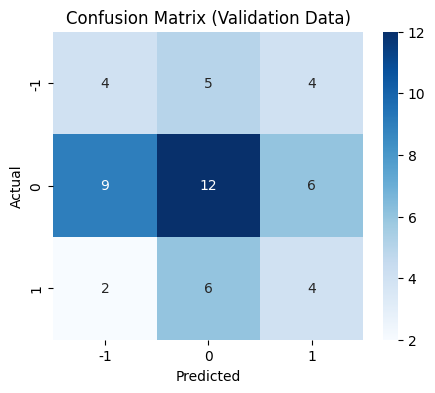


- Random Forest -
Training Accuracy: 1.0000
Training F1 Score: 1.0000
Training Precision: 1.0000
Training Recall: 1.0000
Validation Accuracy: 0.3846
Validation F1 Score: 0.3917
Validation Precision: 0.4035
Validation Recall: 0.3846


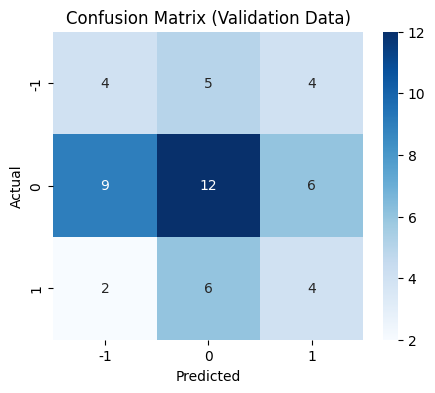


- Gradient Boosting -
Training Accuracy: 0.8566
Training F1 Score: 0.8539
Training Precision: 0.8806
Training Recall: 0.8566
Validation Accuracy: 0.5192
Validation F1 Score: 0.4990
Validation Precision: 0.4969
Validation Recall: 0.5192


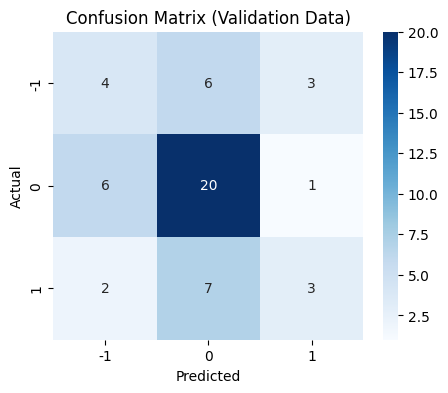


--- GloVe ---

- Decision Tree -
Training Accuracy: 1.0000
Training F1 Score: 1.0000
Training Precision: 1.0000
Training Recall: 1.0000
Validation Accuracy: 0.4231
Validation F1 Score: 0.4328
Validation Precision: 0.4455
Validation Recall: 0.4231


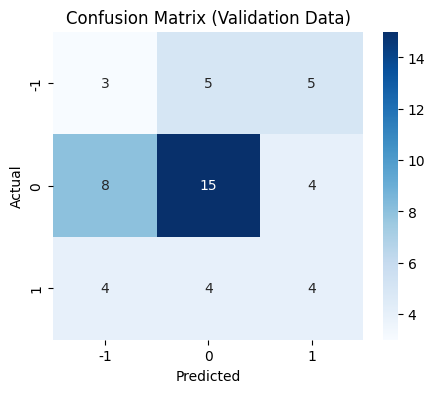


- Random Forest -
Training Accuracy: 1.0000
Training F1 Score: 1.0000
Training Precision: 1.0000
Training Recall: 1.0000
Validation Accuracy: 0.3462
Validation F1 Score: 0.3173
Validation Precision: 0.2937
Validation Recall: 0.3462


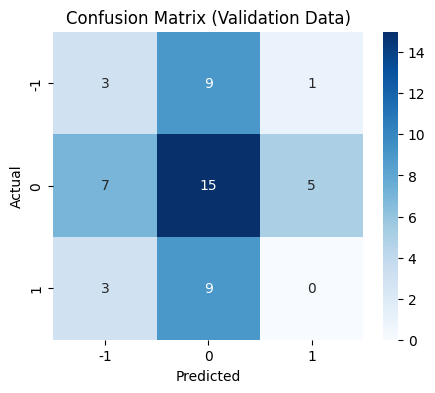


- Gradient Boosting -
Training Accuracy: 1.0000
Training F1 Score: 1.0000
Training Precision: 1.0000
Training Recall: 1.0000
Validation Accuracy: 0.3846
Validation F1 Score: 0.3633
Validation Precision: 0.3555
Validation Recall: 0.3846


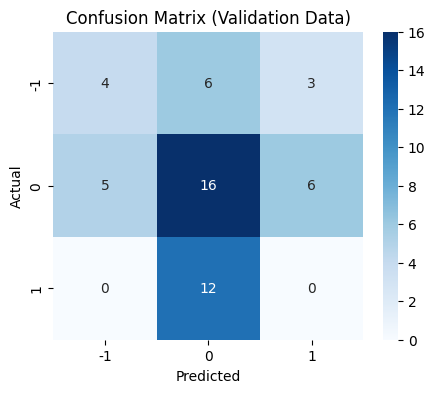


--- Sentence Transformer ---

- Decision Tree -
Training Accuracy: 1.0000
Training F1 Score: 1.0000
Training Precision: 1.0000
Training Recall: 1.0000
Validation Accuracy: 0.3269
Validation F1 Score: 0.3320
Validation Precision: 0.3798
Validation Recall: 0.3269


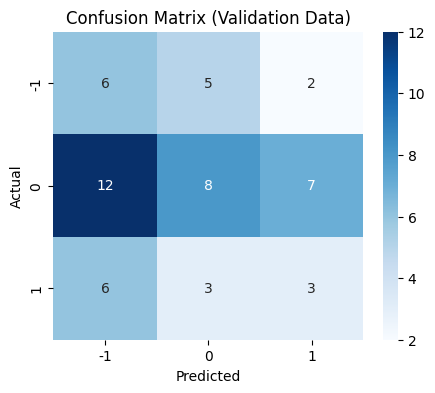


- Random Forest -
Training Accuracy: 1.0000
Training F1 Score: 1.0000
Training Precision: 1.0000
Training Recall: 1.0000
Validation Accuracy: 0.4808
Validation F1 Score: 0.4144
Validation Precision: 0.4496
Validation Recall: 0.4808


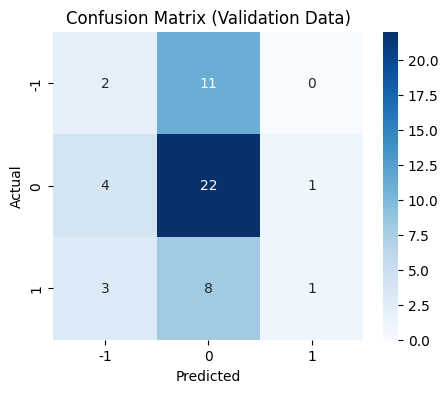


- Gradient Boosting -
Training Accuracy: 1.0000
Training F1 Score: 1.0000
Training Precision: 1.0000
Training Recall: 1.0000
Validation Accuracy: 0.4808
Validation F1 Score: 0.4362
Validation Precision: 0.4336
Validation Recall: 0.4808


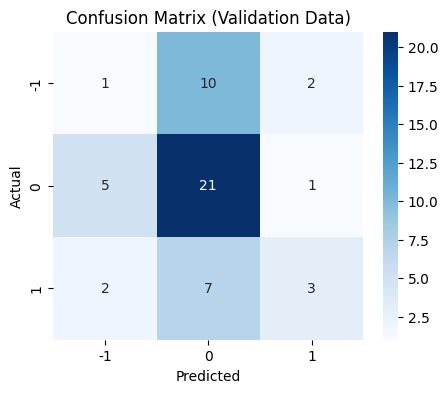

None

In [ ]:
# Define models and parameters for tuning
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Iterate through embedding techniques
for embedding_technique in ["Word2Vec", "GloVe", "Sentence Transformer"]:
    print(f"\n--- {embedding_technique} ---")

    # Get the corresponding data
    if embedding_technique == "Word2Vec":
        X_train = X_train_wv
        X_val = X_val_wv
    elif embedding_technique == "GloVe":
        X_train = X_train_gl
        X_val = X_val_gl
    else:
        X_train = X_train_st
        X_val = X_val_st

    for model_name, model in models.items():

        print(f"\n- {model_name} -")

     # Evaluate and store results
        results = evaluate_model(model,X_train, y_train, X_val, y_val)

display(results)

### Combining the above results

In [ ]:
# Initialize an empty list to store results
results = []

# Loop through embedding techniques and models
for embedding_technique in ["Word2Vec", "GloVe", "Sentence Transformer"]:
    for model_name, model in models.items():
        # Assuming you have code to prepare data (X_train, X_val, y_train, y_val)
        # based on the current embedding technique

        # Get the corresponding data
        if embedding_technique == "Word2Vec":
            X_train = X_train_wv
            X_val = X_val_wv
        elif embedding_technique == "GloVe":
            X_train = X_train_gl
            X_val = X_val_gl
        else:
            X_train = X_train_st
            X_val = X_val_st

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_val)

        # Calculate metrics
        accuracy = accuracy_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred, average='weighted')
        precision = precision_score(y_val, y_pred, average='weighted')
        recall = recall_score(y_val, y_pred, average='weighted')

        # Append results as a dictionary
        results.append({
            'Embedding': embedding_technique,
            'Model': model_name,
            'Accuracy': accuracy,
            'F1': f1,
            'Precision': precision,
            'Recall': recall
        })

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)



In [ ]:
display(results_df)

,Embedding,Model,Accuracy,F1,Precision,Recall
0,Word2Vec,Decision Tree,0.384615,0.391665,0.403504,0.384615
1,Word2Vec,Random Forest,0.384615,0.391665,0.403504,0.384615
2,Word2Vec,Gradient Boosting,0.519231,0.499028,0.496920,0.519231
3,GloVe,Decision Tree,0.403846,0.406120,0.412260,0.403846
4,GloVe,Random Forest,0.384615,0.339419,0.304029,0.384615
5,GloVe,Gradient Boosting,0.384615,0.372526,0.370726,0.384615
6,Sentence Transformer,Decision Tree,0.346154,0.349318,0.373002,0.346154
7,Sentence Transformer,Random Forest,0.480769,0.424439,0.432853,0.480769
8,Sentence Transformer,Gradient Boosting,0.461538,0.421203,0.410816,0.461538


### Evalutate on the test Set

In [ ]:
# Get the corresponding test data based on the best embedding technique
best_embedding_technique = results_df.loc[results_df['Accuracy'].idxmax(), 'Embedding']  # Get embedding of best model
best_model_name = results_df.loc[results_df['Accuracy'].idxmax(), 'Model']

if embedding_technique == "Word2Vec":
    X_test = X_test_wv
elif embedding_technique == "GloVe":
    X_test = X_test_gl
else:
    X_test = X_test_st

In [ ]:
best_model = models[best_model_name]  # Changed from model_name to best_model_name to use the best model
if best_embedding_technique == "Word2Vec":
    X_train_combined = pd.concat([X_train_wv, X_val_wv])
elif best_embedding_technique == "GloVe":
    X_train_combined = pd.concat([X_train_gl, X_val_gl])
else:  # Sentence Transformer
    X_train_combined = np.concatenate([X_train_st, X_val_st])  # Use np.concatenate for NumPy arrays
    X_train_combined = pd.DataFrame(X_train_combined) # Convert to dataframe for consistency

y_train_combined = pd.concat([y_train, y_val])
best_model.fit(X_train_combined, y_train_combined) # Retrain the model
print(best_model_name)
print(best_embedding_technique)

Gradient Boosting
Word2Vec


In [ ]:
# Predict on the test set and evaluate
y_pred_test = best_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test, average='weighted')
precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')

ValueError: X has 384 features, but GradientBoostingClassifier is expecting 100 features as input.

In [ ]:
print(f"Test Accuracy: {accuracy_test:.4f}")
print(f"Test F1 Score: {f1_test:.4f}")
print(f"Test Precision: {precision_test:.4f}")
print(f"Test Recall: {recall_test:.4f}")

In [ ]:
plot_confusion_matrix(best_model, X_test, y_test)

# Summary

Based on the performance metrics from running:

Gradient Boosting Classifier
Decision Tree Classifier
Random Forest Classifier

Random Forest Classifier is the best model with Sentence Transfomer embedding technique.

It has the highest validation accuracy, recall, precision, and F1 score among the models tested.

This model shows .50 on the test set, which is a good score.

### WEEKLY NEWS SUMMARIZATION

### Aggregate news data at the weekly level.

In [ ]:
# Group the data by week using the 'Date' column.
weekly_grouped = data.groupby(pd.Grouper(key='Date', freq='W'))

In [ ]:
weekly_grouped = weekly_grouped.agg(
    {
        'News': lambda x: ' || '.join(x)  # Join the news values with ' || ' separator.
    }
).reset_index()

print(weekly_grouped.shape)

(18, 2)


In [ ]:
weekly_grouped

,Date,News
0,2019-01-06,The tech sector experienced a significant dec...
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...
2,2019-01-20,U.S. stocks declined after the close on Monda...
3,2019-01-27,The White House reportedly rejected a schedul...
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...
5,2019-02-10,"Despite strong January market performance, fe..."
6,2019-02-17,"Japan Display Inc, an ailing Apple supplier, ..."
7,2019-02-24,This news article discusses progress towards ...
8,2019-03-03,"Huawei, the world's third-largest smartphone ..."
9,2019-03-10,"Spotify, the world's largest paid music strea..."


In [ ]:
# creating a copy of the data
data_1 = weekly_grouped.copy()

### SUMMARIZATION

LOADING THE MODEL

In [ ]:
model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
model_basename = "mistral-7b-instruct-v0.2.Q6_K.gguf"

try:
    model_path = hf_hub_download(
        repo_id=model_name_or_path,
        filename=model_basename
    )
    print(f"Model downloaded successfully and saved at {model_path}")
except Exception as e:
    print(f"An error occurred: {e}")

mistral-7b-instruct-v0.2.Q6_K.gguf:   0%|          | 0.00/5.94G [00:00<?, ?B/s]

Model downloaded successfully and saved at /root/.cache/huggingface/hub/models--TheBloke--Mistral-7B-Instruct-v0.2-GGUF/snapshots/3a6fbf4a41a1d52e415a4958cde6856d34b2db93/mistral-7b-instruct-v0.2.Q6_K.gguf


UTILITY FUNCTION

Define a function with parameters to interact with the model and generate summarized insights.

In [ ]:
# defining a function to parse the JSON output from the model
def extract_json_data(json_str):
    import json
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        if json_start != -1 and json_end != -1:
            extracted_category = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_category)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

The above function is like a detective that searches for that JSON data within the text, carefully extracts it, and then translates it into a format (a Python dictionary) that your program can easily understand and use. If the JSON data is not found, it alerts you with a warning.

In [ ]:
# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

In [ ]:
llm=Llama(model_path)

llama_model_loader: loaded meta data with 24 key-value pairs and 291 tensors from /root/.cache/huggingface/hub/models--TheBloke--Mistral-7B-Instruct-v0.2-GGUF/snapshots/3a6fbf4a41a1d52e415a4958cde6856d34b2db93/mistral-7b-instruct-v0.2.Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = mistralai_mistral-7b-instruct-v0.2
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loade

DEFINING THE RESPONSE FUNCTION

In [ ]:
#Defining the response function
def response_mistral_1(prompt, news):
    # Split the news into smaller chunks if it exceeds the context window size
    chunk_size = 256  # Adjust as needed
    news_chunks = [news[i:i + chunk_size] for i in range(0, len(news), chunk_size)]

    final_output = ""
    for chunk in news_chunks:
        model_output = llm(
            f"""
            [INST]
            {prompt}
            News Articles: {chunk}  # Process one chunk at a time
            [/INST]
            """,
            max_tokens=1024,
            temperature=0.7,
            top_p=0.9,
            top_k=50,
            echo=False,
        )
        final_output += model_output["choices"][0]["text"]  # Accumulate outputs

    return final_output

In [ ]:
#Defining the response function
def response_mistral_1(prompt, news):
    model_output = llm(
      f"""
      [INST]
      {prompt}
      News Articles: {news}
      [/INST]
      """,
      max_tokens=1024,      # Set the maximum number of tokens the model should generate for this task.
      temperature=0.7,     # Set the value for temperature.
      top_p=0.9,           # Set the value for top_p.
      top_k=50,            # Set the value for top_k.
      echo=False,
    )

    final_output = model_output["choices"][0]["text"]

    return final_output

Above the response_mistral_1 function provides a structured way to communicate with the LLM, providing it with a prompt and context (news articles), configuring how it should generate the response, and then extracting and returning the generated text.

Checking the model output on a sample


In [ ]:
news = data_1.loc[0, 'News']

The above code retrieves the news article text from the first row and the 'News' column of the data_1 DataFrame and stores it in the news variable.

In [ ]:
print(len(news.split(' ')))
news

2611


' The tech sector experienced a significant decline in the aftermarket following Apple\'s Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple\'s downward revision of its revenue expectations for the quarter, previously announced in January. ||  The dollar fell from above 109 to 106.67 after Apple\'s revenue warning, while the 10-year Treasury yield also dropped to 2.61%. This followed money flowing into US government paper. Apple\'s shares and U.S. stock index futures declined, with the NAS ||  In early Asian trading on Thursday, the Japanese yen surged as the U.S. dollar and Australian dollar collapsed in thin markets due to massive stop loss sales triggered by Apple\'s earnings warning of sluggish iPhone sales in China and risk aversion. The yen reached its lowest levels against the U.S. dollar since March  ||  The Australian dollar experienced significant volatility on Thursday, plunging to multi-

In [ ]:
print("Columns in model_response_parsed:", data_1.columns)


Columns in model_response_parsed: Index(['Date', 'News'], dtype='object')


In [ ]:
# TEST 10
prompt = """
You are an expert data analyst specializing in stock market news article analysis that affects the financial market.
Task: Analyze the news headlines and determine which news articles are positive or negative in sentiment.
Instructions:
1. Read the individual news article that is separated by ' || '.
2. Identify if the article contains positive or negative sentiment based on optimistic or pessimistic indicators.
2. Extract each article and create a summary based on the sentiment (Positive or Negative).
2. Summarize results by grouping by date into weeks, include the individual news articles and count the number of Positive (1) and Negative (-1) sentiments.
Output the results in JSON format.
"""

In [ ]:
max_tokens = 256  # Reserve some tokens for the prompt and instructions
news_truncated = " ".join(news.split()[:max_tokens])  # Keep only the first 256 words


In [ ]:
%%time
summary = response_mistral_1(prompt, news_truncated)
print(summary)

ValueError: Requested tokens (572) exceed context window of 512

# This model perfectly summarized the news articles and identified, if the article contains positive or negative sentiment.

In [ ]:
%%time
data_1['Key Events'] = data_1['News'].progress_apply(lambda x: response_mistral_1(prompt,x))

  6%|▌         | 1/18 [00:00<00:00, 49.43it/s]


ValueError: Requested tokens (3918) exceed context window of 512

This code takes each article one by one, sends it to the LLM with instructions (the prompt) to extract key events, gets the results back from the LLM, and then stores these results in a new column called 'Key Events' in your DataFrame. It also measures how long this process takes.

# This model perfectly processed news articles and extract key events using a Large Language Model (LLM)

In [ ]:
data_1['model_response_parsed'] = data_1['Key Events'].apply(extract_json_data)
data_1.head()

KeyError: 'Key Events'

In [ ]:
model_response_parsed = pd.json_normalize(data_1['model_response_parsed'])
model_response_parsed.head()

In [ ]:
print("Columns in model_response_parsed:", model_response_parsed.columns)


In [ ]:
model_response_parsed

# Conclusions and Recommendations
## Model Recommendation

## Recommendation for model is the RandomForestClassifier with Tuned Model (Sentence Transformer). It has the highest validation accuracy, recall, precision, and F1 score among the models tested.

## The RandomForestClassifier with Tuned Model (Sentence Transformer) generalizes well to new, unseen data and is the most effective model for this task.